In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import time

In [12]:
apikey = "9ebcef3f7cf3536459e06be3dbdfd70d"
ticker = "ETHUSD"
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from=2003-01-01&datatype=csv&apikey={apikey}"
response = requests.get(url)
csv_data = response.content.decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))

# df.index.freq='MS'

In [13]:
df.head(5)

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2023-05-12,1795.371600,1800.326900,1742.515100,1772.415600,1772.415600,9300493312,9300493312,-22.96000,-1.278620,1771.75,"May 12, 23",-0.012786
1,2023-05-11,1842.155273,1842.155273,1778.769775,1796.294556,1796.294556,8728497152,8728497152,-45.86072,-2.490000,1805.74,"May 11, 23",-0.024900
2,2023-05-10,1842.000000,1843.620000,1770.710000,1796.440000,1842.401489,9945549603,9945549603,-45.56000,-2.470000,1806.44,"May 10, 23",-0.024700
3,2023-05-09,1847.500000,1888.970000,1789.750000,1842.470000,1848.603149,6129516088,6129516088,-5.03000,-0.272260,1846.26,"May 09, 23",-0.002723
4,2023-05-08,1849.110000,1863.300000,1831.540000,1847.690000,1849.042725,9895102899,9895102899,-1.42000,-0.076794,1844.93,"May 08, 23",-0.000768


In [48]:
# df = df[['date','close']]
# df['date'] = pd.to_datetime(df['date'])
# # df['date'] = pd.DatetimeIndex(df['date'])
# df.set_index('date')
# df
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[['close']]
df.head(5)

,close
date,
2023-05-12,1772.415600
2023-05-11,1796.294556
2023-05-10,1796.440000
2023-05-09,1842.470000
2023-05-08,1847.690000


<Axes: xlabel='date'>

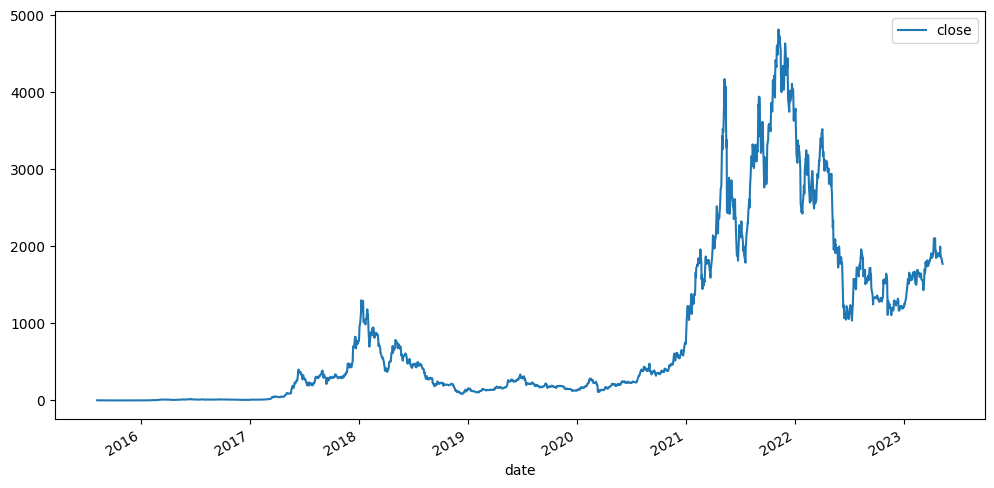

In [50]:
df.plot(y='close',figsize=(12,6))

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
len(df)

2028

In [54]:
df = df.dropna()
split_date = '2023-01-01'
train = df.loc[df.index<split_date]
test = df.loc[df.index>split_date]

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
df.head(),df.tail()

(                  close
 date                   
 2023-05-12  1772.415600
 2023-05-11  1796.294556
 2023-05-10  1796.440000
 2023-05-09  1842.470000
 2023-05-08  1847.690000,
                close
 date                
 2015-08-13  1.827670
 2015-08-12  1.217440
 2015-08-11  1.067860
 2015-08-10  0.708448
 2015-08-07  2.772120)

In [57]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [58]:
scaled_train[:10]

array([[0.24916387],
       [0.24930053],
       [0.247128  ],
       [0.25162266],
       [0.25509039],
       [0.25345423],
       [0.25296505],
       [0.25216365],
       [0.25282381],
       [0.24260657]])

In [59]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [60]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
a,b=(2,5)

In [61]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.24916387 0.24930053 0.247128  ]
Predict this y: 
 [[0.25162266]]


In [62]:
X.shape

(1, 3, 1)

In [63]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [69]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [67]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
1919/1919 [==============================] - 16s 7ms/step - loss: 0.0021
Epoch 2/50
1919/1919 [==============================] - 14s 7ms/step - loss: 9.2197e-04
Epoch 3/50
1919/1919 [==============================] - 14s 7ms/step - loss: 6.5617e-04
Epoch 4/50
1919/1919 [==============================] - 14s 7ms/step - loss: 5.7329e-04
Epoch 5/50
1919/1919 [==============================] - 14s 7ms/step - loss: 5.1087e-04
Epoch 6/50
1919/1919 [==============================] - 14s 7ms/step - loss: 4.2526e-04
Epoch 7/50
1919/1919 [==============================] - 16s 8ms/step - loss: 4.3536e-04
Epoch 8/50
1919/1919 [==============================] - 14s 7ms/step - loss: 4.0923e-04
Epoch 9/50
1919/1919 [==============================] - 15s 8ms/step - loss: 4.1324e-04
Epoch 10/50
1919/1919 [==============================] - 15s 8ms/step - loss: 3.8557e-04
Epoch 11/50
1919/1919 [==============================] - 14s 7ms/step - loss: 3.9245e-04
Epoch 12/50
1919/1919 [===========

In [75]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

AttributeError: ignored

In [76]:
last_train_batch = scaled_train[-12:]

In [77]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [78]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 222ms/step


array([[-2.5015932e-05]], dtype=float32)

In [79]:
scaled_test[0]

array([0.36826864])

In [80]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [81]:
test_predictions

[array([-2.5015932e-05], dtype=float32),
 array([-2.0068217e-05], dtype=float32),
 array([-1.6235055e-05], dtype=float32),
 array([-1.3186342e-05], dtype=float32),
 array([-1.0736498e-05], dtype=float32),
 array([-8.7619355e-06], dtype=float32),
 array([-7.0514643e-06], dtype=float32),
 array([-5.318824e-06], dtype=float32),
 array([-3.8441294e-06], dtype=float32),
 array([-2.861982e-06], dtype=float32),
 array([-2.0854686e-06], dtype=float32),
 array([-1.6103456e-06], dtype=float32),
 array([-1.9451068e-07], dtype=float32),
 array([-1.6837728e-07], dtype=float32),
 array([-1.386529e-07], dtype=float32),
 array([-1.0985424e-07], dtype=float32),
 array([-8.386358e-08], dtype=float32),
 array([-6.1928596e-08], dtype=float32),
 array([-4.397358e-08], dtype=float32),
 array([-2.988216e-08], dtype=float32),
 array([-1.9856284e-08], dtype=float32),
 array([-1.2828895e-08], dtype=float32),
 array([-7.699728e-09], dtype=float32),
 array([-3.993859e-09], dtype=float32),
 array([-1.5839255e-09],

In [82]:
test.head()

,close
date,
2023-05-12,1772.415600
2023-05-11,1796.294556
2023-05-10,1796.440000
2023-05-09,1842.470000
2023-05-08,1847.690000


In [83]:
true_predictions = scaler.inverse_transform(test_predictions)

In [93]:
test['close'] = true_predictions

<ipython-input-93-41cecdb8f2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['close'] = true_predictions


<Axes: xlabel='date'>

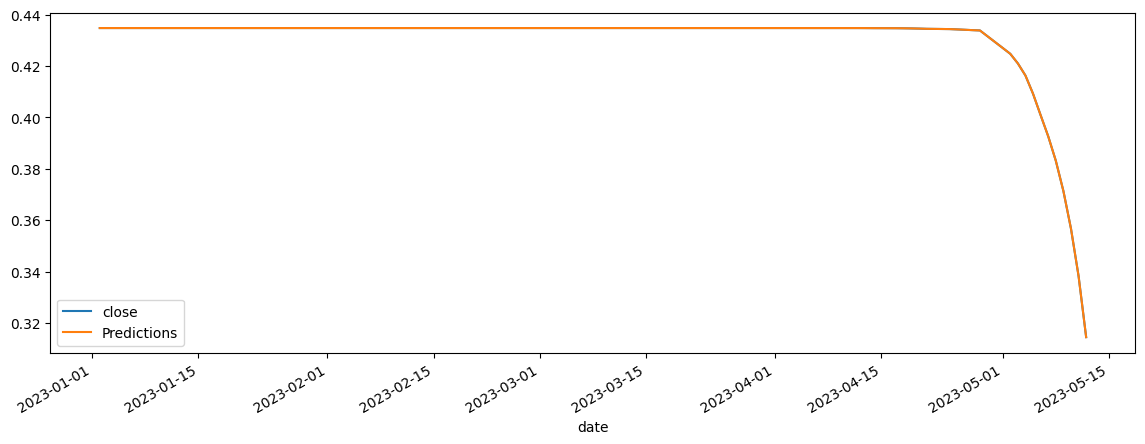

In [94]:
test.plot(figsize=(14,5))

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['close'],test['close']))
print(rmse)

0.0
